# HOME RENOVATION - REGRESSION ANALYSIS

## Business Understanding
### *Introduction*
The real estate agency aims to leverage  multiple linear regression modeling to provide valuable insights and advice to homeowners regarding home renovations and their potential impact on the estimated value of their properties. By analyzing historical sales data and employing multiple linear regression modeling, the real estate agency can provide evidence-based recommendations to homeowners, helping them prioritize renovations and estimate the potential increase in their home's value.

### *Problem Statement*:
The problem at hand is to assess the impact of home renovations on the estimated value of properties in the northwestern country. The real estate agency needs to determine the specific renovations that are likely to yield the highest return on investment and provide homeowners with accurate advice on how these renovations can potentially increase the estimated value of their homes.

### *Main Objective* :
The main objective of this project is to develop a  non-robust multiple linear regression model using the King County house sales dataset to estimate the impact of home renovations on the sale price of properties accurately. The model will serve as a tool for the real estate agency to provide homeowners with advice on how renovations might increase the estimated value of their homes and by what amount.

### *Specific Objective* :

* Explore and preprocess the King County house sales dataset, ensuring that the necessary variables related to home renovations are included    and properly handled.
* Select relevant features from the dataset that are likely to have a significant impact on the sale price, including variables related to home renovations.
* Develop a non-robust multiple linear regression model using the selected features and the sale price as the target variable.
* estimate the regression coefficients for each feature, including those related to home renovations.
* Analyze the coefficients of the renovation-related features to determine the estimated impact of different renovations on the sale price.
* Provide homeowners with specific recommendations and insights on how home renovations can potentially increase the estimated value of their    properties, including the approximate amount by which the sale price might increase for each renovation.
* Evaluate the model's performance and fine-tune it if necessary, ensuring that it accurately captures the relationship between renovations and the sale price of properties.
* Monitor market trends and updates in renovation practices to continuously enhance the model's recommendations and provide homeowners with up-to-date insights.

### Data Understanding

The data sources for this analysis will be pulled from the following file :
* **Source**: This dataset comes from: <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r">King County Assessor Website</a>
* **Contents**: It contains data of :
id: date: price: bedrooms: bathrooms: sqft_living:sqft_lot: floors: waterfront: view: condition: grade: sqft_above: sqft_basement: yr_built: yr_renovated: zipcode: lat: long: sqft_living15: sqft_lot15: 
* **Format**: CSV data


### Setup
In the cell below we import the relevant libraries required:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import  LinearRegression

In [84]:
#load the csv file preview of the data columns and content
data = pd.read_csv("kc_house_data.csv")
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [85]:
# Checking if dataset is complete and  confirming dtype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### data cleaning inclusive of handling missing values


In [86]:

# Handling missing data in 'waterfront' column
data['waterfront'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown' category

# Handling missing data in 'view' column
data['view'].fillna('No View', inplace=True)  # Fill missing values with 'No View' category


# Handling missing data in 'yr_renovated' column
data['yr_renovated'].fillna(0, inplace=True)  # Assuming missing values mean no renovation, fill with 0

# Confirm the missing values have been handled
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

Missing Values After Handling:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [87]:
# Perform feature engineering impotant  The age of a house can capture important information that contributes 
#to the variation in sale prices beyond other features in the dataset.
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']  # Create a new feature by combining square footage of living space and lot
data['age'] = 2023 - data['yr_built']  # Calculate the age of the house
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,6830,68
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9812,72
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,10770,90
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6960,58
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,9760,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2661,14
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8123,9
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2370,14
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Unknown,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,3988,19


In [88]:
# aim is to one hot encode condition column
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Copy the 'condition' column to a new DataFrame
data_category = data[["condition"]].copy()

# Fit the OneHotEncoder on the 'condition' column
ohe.fit(data_category)

# Transform the 'condition' column using the fitted encoder
ohe.transform(data_category)

# Create a DataFrame with the transformed 'condition' column
data_category_ohe = pd.DataFrame(data=ohe.transform(data_category), columns=[f"condition_{cat}" for cat in ohe.categories_[0][1:]])

# Concatenate the original numerical features and the encoded 'condition' column
X_all = pd.concat([data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price','age','total_sqft']], data_category_ohe], axis=1)
X_all

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,price,age,total_sqft,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,3,1.00,1180,5650,1.0,Unknown,NONE,7 Average,1180,0.0,...,-122.257,1340,5650,221900.0,68,6830,0.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,400.0,...,-122.319,1690,7639,538000.0,72,9812,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,0.0,...,-122.233,2720,8062,180000.0,90,10770,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,910.0,...,-122.393,1360,5000,604000.0,58,6960,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,0.0,...,-122.045,1800,7503,510000.0,36,9760,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,0.0,...,-122.346,1530,1509,360000.0,14,2661,0.0,0.0,0.0,0.0
21593,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,0.0,...,-122.362,1830,7200,400000.0,9,8123,0.0,0.0,0.0,0.0
21594,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,0.0,...,-122.299,1020,2007,402101.0,14,2370,0.0,0.0,0.0,0.0
21595,3,2.50,1600,2388,2.0,Unknown,NONE,8 Good,1600,0.0,...,-122.069,1410,1287,400000.0,19,3988,0.0,0.0,0.0,0.0


In [89]:
#code to standardize my data
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns from the dataset
numeric_data = X_all.select_dtypes(include='number')

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected columns
columns_to_standardize = scaler.fit_transform(numeric_data)


In [90]:
# checking the correlation of the numeric columns with the target column

# Convert the standardized columns back to a DataFrame
columns_to_standardize = pd.DataFrame(columns_to_standardize, columns=numeric_data.columns)

# Calculate the correlation matrix
correlation_matrix = columns_to_standardize.corr()

# Print the correlation between the numeric columns and the 'price' column
target_correlation = correlation_matrix['price'].drop('price')
print(target_correlation)


bedrooms               0.308787
bathrooms              0.525906
sqft_living            0.701917
sqft_lot               0.089876
floors                 0.256804
sqft_above             0.605368
yr_built               0.053953
yr_renovated           0.117855
zipcode               -0.053402
lat                    0.306692
long                   0.022036
sqft_living15          0.585241
sqft_lot15             0.082845
age                   -0.053953
total_sqft             0.105009
condition_Fair        -0.051432
condition_Good        -0.030759
condition_Poor        -0.019886
condition_Very Good    0.057531
Name: price, dtype: float64


Interpreting the correlation values:

* Bedrooms, bathrooms, sqft_living, sqft_above, and sqft_living15 have a relatively high positive correlation with price. This means that as these features increase, the price tends to increase as well.

* Floors, yr_renovated, and condition_Very Good have a moderate positive correlation with price.
* Sqft_lot, yr_built, zipcode, and age have a weak correlation with price.
* Condition_Fair, condition_Good, and condition_Poor have a weak negative correlation with price

based on the interpretation ,create a baseline simple linear regression model, using the feature among the highest correlation (sqft_living) as the predictor and price as the target variable

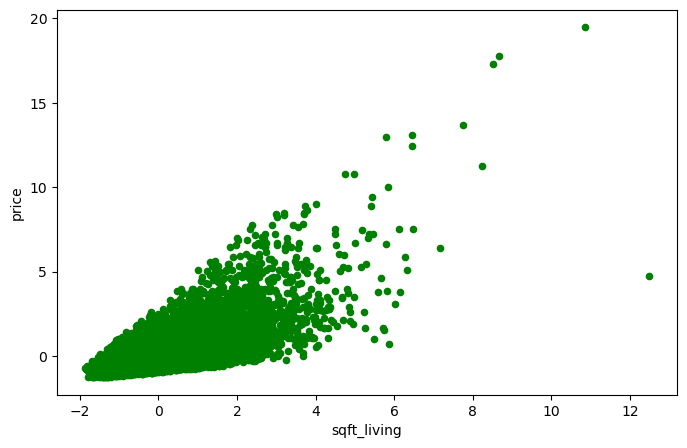

In [91]:
#plot to check whether there is a linear relation between the price and sqft_living
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, figsize=(8,5), sharey=True)
ax.set_ylabel("price")

columns_to_standardize.plot.scatter(x='sqft_living', y="price", ax=ax, color ='green');

From the visualization, there is a linear relation between the x and y variables.thus allowing one perform linear regression modelling

###Simple linear regression model the baseline

In [92]:
# Set the predictor and target variables
X = columns_to_standardize['sqft_living']
y = columns_to_standardize['price']

# Add constant to the predictor variable
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:45:29   Log-Likelihood:                -23317.
No. Observations:               21597   AIC:                         4.664e+04
Df Residuals:                   21595   BIC:                         4.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.469e-17      0.005  -7.16e-15      

From the linear regression above :
 * the adjusted R-squared value is 0.493, indicating that approximately 49.3% of the variance in the target variable (price) can be explained by the predictor variable (sqft_living).
 * The coefficient for the predictor variable sqft_living is 0.7019. This means that for every unit increase in sqft_living, the predicted price increases by 0.7019.
 * The p-value indicates the statistical significance of the coefficient. In this case, the t-value for sqft_living is 144.819, and the p-value is very close to 0, indicating that the coefficient is statistically significant.
 * The 95% confidence interval provides a range of values within which the true coefficient is likely to fall. For sqft_living, the 95% confidence interval is [0.692, 0.711].
 The linear model equation can be written as:

           price = 0.7019 * sqft_living + const

This equation represents the relationship between the predictor variable (sqft_living) and the target variable (price) in the simple linear regression model.



* From the above analysis, the simple linear regression model using only the predictor variable sqft_living has an R-squared value of 0.493, indicating that it explains approximately 49.3% of the variance in the target variable (price). While this is a decent level of explanation, there might be other variables in the dataset that could further improve the model's predictive power.
* a multiple linear regression model can provide a more comprehensive analysis of the relationships between predictors and the target variable, potentially improving the model's predictive accuracy and providing a deeper understanding of the factors influencing the price.

### Multilinear regression modelling

In [93]:
# Select the predictors and target variable
X = columns_to_standardize[['bedrooms', 'bathrooms', 'sqft_living','sqft_living15','floors','lat','condition_Very Good','yr_renovated']]
y = columns_to_standardize['price']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results1 = model.fit()

# Print the summary of the model
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     3951.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:45:30   Log-Likelihood:                -20907.
No. Observations:               21597   AIC:                         4.183e+04
Df Residuals:                   21588   BIC:                         4.190e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.313e-15    

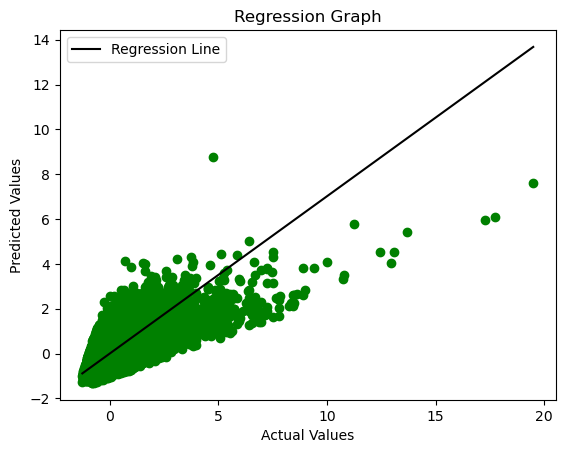

In [94]:

# Get the predicted values from the regression model
predicted = results.predict()

# Create a scatter plot of the actual values vs. the predicted values
plt.scatter(y, predicted ,color ='green' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Graph')

# Add the regression line
x_vals = np.linspace(min(y), max(y), 100)
y_vals = results.params[0] + results.params[1] * x_vals
plt.plot(x_vals, y_vals, color='black', label='Regression Line')

plt.legend()
plt.show()



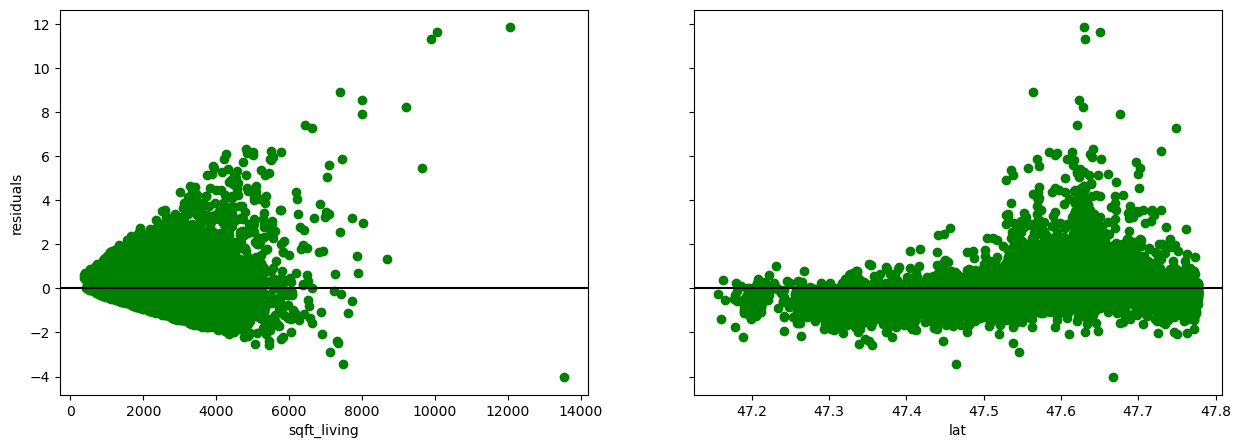

In [95]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

weight_ax = axes[0]
weight_ax.scatter(data["sqft_living"],results.resid, color ='green')
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("sqft_living")
weight_ax.set_ylabel("residuals")

year_ax = axes[1]
year_ax.scatter(data["lat"], results.resid, color = 'green')
year_ax.axhline(y=0, color="black")
year_ax.set_xlabel("lat");

### Interpretation of the multilinear model
* adjusted R-squared value of 0.594. This means that approximately 59.4% of the variance in the home prices can be explained by the predictors included in the model, an increase compared to the simple linear regression
* Property Condition and Renovation: The condition of the property (condition_Very Good) and the year of renovation (yr_renovated) also have a significant impact on the estimated home prices. A higher property condition and more recent renovations positively affect the home's value.
* Location: Similar to the previous model, latitude (lat) remains an important factor in determining the estimated value. Higher latitudes are associated with higher home prices.
* Several predictors have a significant impact on the estimated home prices. The number of bedrooms, bathrooms, square footage of living area (sqft_living), square footage of living area in 2015 (sqft_living15), latitude (lat), property condition (condition_Very Good), and year of renovation (yr_renovated) all have statistically significant coefficients.
* Bedrooms : The number of bedrooms show a negative impact on the estimated home prices. This suggests that an increase in the number of bedrooms might lead to a decrease in the home's value
* Other Predictors: The number of floors (floors) does not show a significant impact on the estimated home prices in the current model.



## conclusions
* Rationale:
the goal was to identify the significant factors that influence home prices and provide insights for pricing and valuation purposes.
* Results
    The multilinear regression analysis resulted in a model that explains approximately 59.4% of the variance in home prices, as indicated by the adjusted R-squared value. This suggests that the included predictors collectively have a moderate ability to explain and predict the variation in home prices.

    The analysis identified several predictors with significant impacts on home prices. The number of bedrooms, bathrooms, square footage of living area, latitude, property condition, and year of renovation all showed statistically significant coefficients. These findings indicate that these factors play a role in determining home prices.

* Limitations
   First, the analysis assumes a linear relationship between the predictors and the target variable. However, it's possible that some predictors have nonlinear relationships with home prices, which may not be captured adequately by the model.

   The included predictors may not capture all the relevant factors influencing home prices. There could be other important variables, such as neighborhood amenities, school quality, or economic factors, that were not included in the analysis. The absence of these variables may limit the model's explanatory power and predictive accuracy.

   The analysis assumes that the underlying data meets the assumptions of multilinear regression, such as independence, linearity, and homoscedasticity. Violations of these assumptions can affect the validity of the results.

   The model's performance, as indicated by the adjusted R-squared value, suggests that there is still a significant portion of the variance in home prices that remains unexplained. This indicates that there are other factors beyond the included predictors that contribute to home prices.
   
   The results of the analysis are specific to the dataset and context used. The findings may not generalize well to other regions, time periods, or housing markets with different characteristics.


## recommendations

* Renovate and Improve Property Condition: The condition of the property (condition_Very Good) has a positive impact on the estimated home prices. Homeowners should focus on improving the overall condition of their properties by addressing any maintenance issues, upgrading fixtures, and enhancing the overall appearance and functionality of the home.
* Increase Living Space: The square footage of the living area positively impact the estimated home prices. Increasing the living space can attract potential buyers and potentially lead to higher property values.
Pay Attention to Bedroom and Bathroom Ratios: Although the number of bedrooms and bathrooms still have an average impact on the estimated home prices in the model, it is essential to consider other factors and interactions. Homeowners should ensure that the bedroom and bathroom ratios are appropriate for the size of the home and the target market. For example, a three-bedroom house might benefit from having at least two bathrooms to meet the expectations of potential buyers.
* Consult with Real Estate Professionals: Real estate professionals have a comprehensive understanding of the local market conditions and factors that influence home prices. These professionals can provide insights into the local market trends, buyer preferences, and potential return on investment for various renovation projects.

